#   Lab 3 - Deep Learning Library in PyTorch

Q1

In [25]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader , TensorDataset

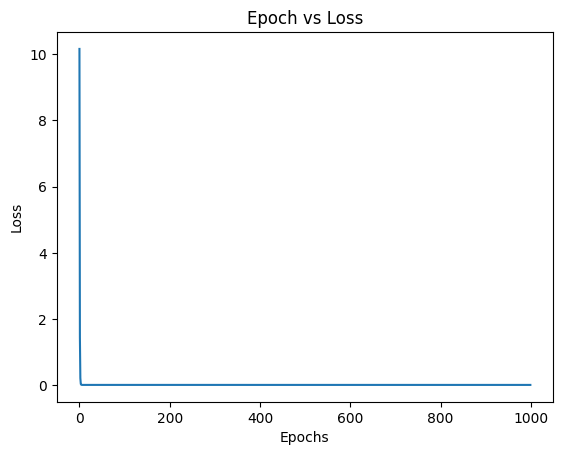

In [20]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
learning_rate = 0.001
epochs = 1000
losses = []

for epoch in range(epochs):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()
    losses.append(loss.item())

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()

Q2

In [23]:
x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])

def compute_gradients(x, y, w, b):
    y_pred = w * x + b
    error = y_pred - y
    w_grad = (2 / len(x)) * torch.sum(error * x)
    b_grad = (2 / len(x)) * torch.sum(error)
    return w_grad, b_grad

w = 1.0
b = 1.0
learning_rate = 0.001
w_grad, b_grad = compute_gradients(x, y, w, b)
print(f"Initial w.grad: {w_grad}, b.grad: {b_grad}")

for epoch in range(2):
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad
    w_grad, b_grad = compute_gradients(x, y, w, b)
    print(f"Epoch {epoch + 1} - Updated w: {w}, b: {b}, w.grad: {w_grad}, b.grad: {b_grad}")

Initial w.grad: -174.0, b.grad: -52.0
Epoch 1 - Updated w: 1.1740000247955322, b: 1.0520000457763672, w.grad: -170.20799255371094, b.grad: -50.85199737548828
Epoch 2 - Updated w: 1.344208002090454, b: 1.1028521060943604, w.grad: -166.4987335205078, b.grad: -49.72904968261719


Q3

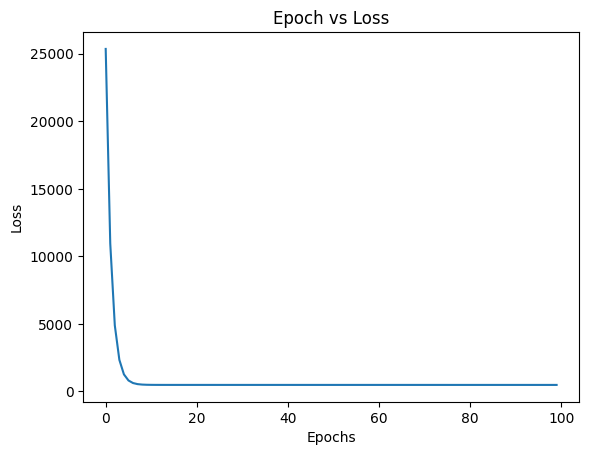

In [24]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class RegressionModel:
    def __init__(self):
        self.w = torch.tensor(1.0, requires_grad=True)
        self.b = torch.tensor(1.0, requires_grad=True)

    def forward(self, x):
        return self.w * x + self.b

    def update(self, learning_rate):
        with torch.no_grad():
            self.w -= learning_rate * self.w.grad
            self.b -= learning_rate * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

    def criterion(self, y, yp):
        return torch.mean((yp - y) ** 2)

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = 0.001
epochs = 100
model = RegressionModel()
losses = []

for epoch in range(epochs):
    y_pred = model.forward(x)
    loss = model.criterion(y, y_pred)
    losses.append(loss.item())
    
    loss.backward()
    model.update(learning_rate)
    model.reset_grad()

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()

Q4

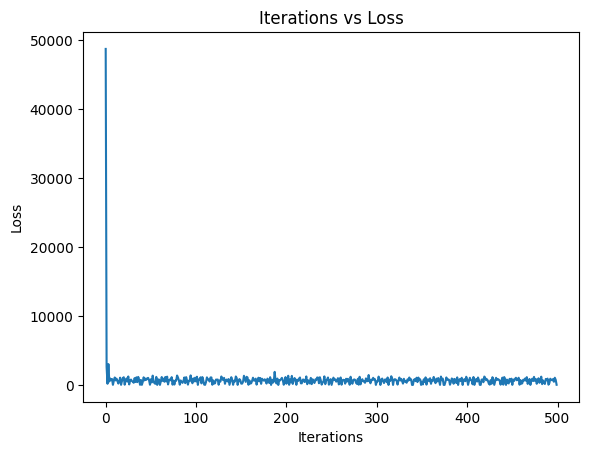

In [26]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

x = torch.tensor([[5.0], [7.0], [12.0], [16.0], [20.0]])
y = torch.tensor([[40.0], [120.0], [180.0], [210.0], [240.0]])

dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 100
losses = []

for epoch in range(epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        y_pred = model(inputs)
        loss = criterion(y_pred, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations vs Loss')
plt.show()

Q5

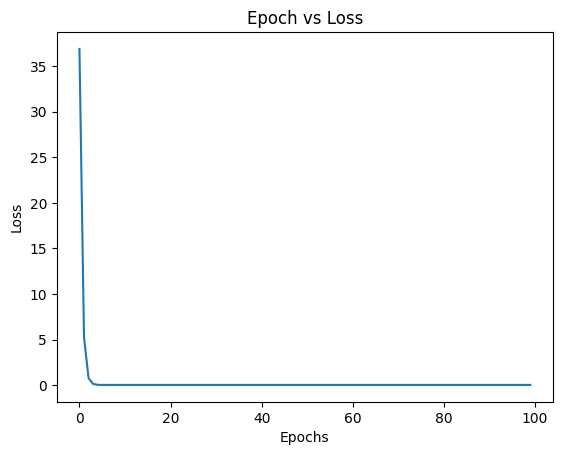

Final weight: 0.9068831205368042, Final bias: -0.5566411018371582


In [28]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2]).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6]).view(-1, 1)

model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 100
losses = []
for epoch in range(epochs):
    yp = model(x)
    loss = criterion(yp, y)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()

print(f"Final weight: {model.weight.item()}, Final bias: {model.bias.item()}")

Q6

In [31]:
X = torch.tensor([[1.0, 1.0], [2.0, 1.0], [3.0, 1.0], [4.0, 1.0], [5.0, 1.0],
                  [3.0, 2.0], [4.0, 2.0], [5.0, 2.0], [6.0, 2.0], [7.0, 2.0]])
y = torch.tensor([[3.7], [3.5], [2.5], [11.5], [5.7], [2.5], [3.5], [4.5], [5.5], [6.5]])

model = nn.Linear(2, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

epochs= 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

test_input = torch.tensor([[3.0, 2.0]])
predicted_value = model(test_input)
print(f"Predicted value for X1=3, X2=2: {predicted_value.item()}")

Predicted value for X1=3, X2=2: 3.4140560626983643


Q7

In [18]:
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)

model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    yp = model(x)
    loss = criterion(yp, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predictions = model(x).detach().numpy()
print(predictions)

[[0.21245158]
 [0.25226694]
 [0.30853176]
 [0.30853176]
 [0.50792545]
 [0.80682856]
 [0.92742527]
 [0.94413656]
 [0.9855882 ]]
